In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # A great library for interactive plots

# Set some display options for pandas
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Define file paths
# We are inside the /app/notebooks directory in the container
DATA_DIR = "../data/parquet/"
SPX_FILE = DATA_DIR + "SPX_20250613.parquet"
OPTIONS_FILE = DATA_DIR + "SPX_OPTIONS_20250613.parquet"

# Load the data using pandas
try:
    spx_df = pd.read_parquet(SPX_FILE)
    options_df = pd.read_parquet(OPTIONS_FILE)
    print("Data loaded successfully!")
except FileNotFoundError as e:
    print(f"Error loading data: {e}")
    print("Please ensure you have run the `create_mock_data.py` script first.")

Data loaded successfully!


In [4]:
# --- Explore the SPX Data ---
print("--- SPX Data ---")
print("Shape of the data (rows, columns):", spx_df.shape)
print("\nFirst 5 rows:")
spx_df.head()

--- SPX Data ---
Shape of the data (rows, columns): (390, 5)

First 5 rows:


,open,high,low,close,volume
timestamp,,,,,
2025-06-13 09:30:00,5200.566429,5200.566429,5200.566429,5200.566429,2678
2025-06-13 09:31:00,5200.810759,5200.810759,5200.810759,5200.810759,2831
2025-06-13 09:32:00,5200.672722,5200.672722,5200.672722,5200.672722,1285
2025-06-13 09:33:00,5201.732793,5201.732793,5201.732793,5201.732793,1140
2025-06-13 09:34:00,5201.621421,5201.621421,5201.621421,5201.621421,1725


In [5]:
# Basic info and statistics for SPX data
print("\nSPX Data Info:")
spx_df.info()

print("\n\nSPX Descriptive Statistics:")
spx_df.describe()



SPX Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 390 entries, 2025-06-13 09:30:00 to 2025-06-13 15:59:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    390 non-null    float64
 1   high    390 non-null    float64
 2   low     390 non-null    float64
 3   close   390 non-null    float64
 4   volume  390 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 16.8 KB


SPX Descriptive Statistics:


,open,high,low,close,volume
count,390.000000,390.000000,390.000000,390.000000,390.000000
mean,5199.138606,5199.138606,5199.138606,5199.138606,2996.217949
std,2.900838,2.900838,2.900838,2.900838,1182.859818
min,5193.876431,5193.876431,5193.876431,5193.876431,1003.000000
25%,5196.313849,5196.313849,5196.313849,5196.313849,1937.750000
50%,5199.872586,5199.872586,5199.872586,5199.872586,2964.500000
75%,5201.621175,5201.621175,5201.621175,5201.621175,4010.750000
max,5204.531756,5204.531756,5204.531756,5204.531756,4997.000000


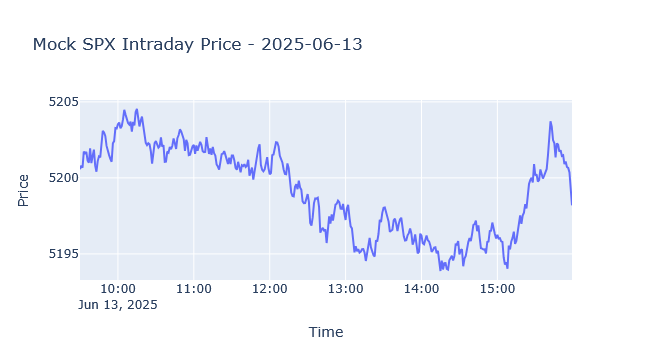

In [6]:
# Plot the SPX closing price to visualize the intraday movement
fig = px.line(spx_df, y='close', title='Mock SPX Intraday Price - 2025-06-13', labels={'timestamp': 'Time', 'close': 'Price'})
fig.show()

In [7]:
# --- Explore the Options Data ---
print("\n--- Options Data ---")
print("Shape of the data (rows, columns):", options_df.shape)
print("\nFirst 5 rows:")
options_df.head()


--- Options Data ---
Shape of the data (rows, columns): (390, 7)

First 5 rows:


,underlying_price,contract_type,expiration,strike,bid,ask,delta
timestamp,,,,,,,
2025-06-13 09:30:00,5200.566429,put,2025-06-13,5180,-0.490730,-0.302921,-0.1
2025-06-13 09:30:00,5200.566429,put,2025-06-13,5190,0.502510,0.660611,0.0
2025-06-13 09:30:00,5200.566429,put,2025-06-13,5200,1.569072,1.686263,0.1
2025-06-13 09:30:00,5200.566429,put,2025-06-13,5210,2.500864,2.613434,0.2
2025-06-13 09:30:00,5200.566429,put,2025-06-13,5220,3.553447,3.686805,0.3


In [8]:
# Let's look at the options data at a specific point in time
# For example, let's grab the first timestamp available in the options data
sample_timestamp = options_df.index[0]
print(f"Displaying options chain at {sample_timestamp}:")
options_df.loc[sample_timestamp]

Displaying options chain at 2025-06-13 09:30:00:


,underlying_price,contract_type,expiration,strike,bid,ask,delta
timestamp,,,,,,,
2025-06-13 09:30:00,5200.566429,put,2025-06-13,5180,-0.490730,-0.302921,-0.1
2025-06-13 09:30:00,5200.566429,put,2025-06-13,5190,0.502510,0.660611,0.0
2025-06-13 09:30:00,5200.566429,put,2025-06-13,5200,1.569072,1.686263,0.1
2025-06-13 09:30:00,5200.566429,put,2025-06-13,5210,2.500864,2.613434,0.2
2025-06-13 09:30:00,5200.566429,put,2025-06-13,5220,3.553447,3.686805,0.3


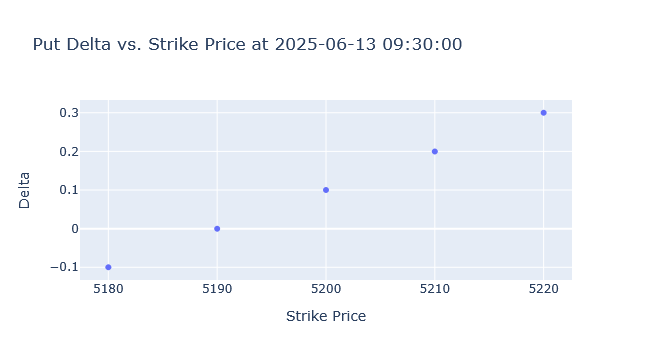

In [9]:
# Let's explore the relationship between strike price and delta
# This is a classic options "sanity check"
sample_chain = options_df.loc[sample_timestamp]

fig = px.scatter(sample_chain, x='strike', y='delta', title=f'Put Delta vs. Strike Price at {sample_timestamp}')
fig.update_layout(xaxis_title="Strike Price", yaxis_title="Delta")
fig.show()
# As expected for puts, delta approaches 0 for higher (further OTM) strikes.